<a href="https://colab.research.google.com/github/Amuktha28/AI-BOT/blob/main/gstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPROCESSING

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
X_train = pd.read_csv('/content/X_Train_Data_Input.csv')
Y_train = pd.read_csv('/content/Y_Train_Data_Target.csv')
X_test = pd.read_csv('/content/X_Test_Data_Input.csv')
Y_test = pd.read_csv('/content/Y_Test_Data_Target.csv')

# Drop the 'ID' column from X_train and X_test
X_train_clean = X_train.drop(columns=['ID'])
X_test_clean = X_test.drop(columns=['ID'])

# Drop the 'ID' column from Y_train and Y_test
Y_train_clean = Y_train.drop(columns=['ID'])
Y_test_clean = Y_test.drop(columns=['ID'])

# Ensure Y_train and Y_test are in the correct format (1D array)
Y_train_clean = Y_train_clean.values.ravel()
Y_test_clean = Y_test_clean.values.ravel()

# Check the shapes
print(f'X_train_clean shape: {X_train_clean.shape}')  # Should be 2D
print(f'Y_train_clean shape: {Y_train_clean.shape}')  # Should be 1D

# Check for sample mismatches
if X_train_clean.shape[0] != Y_train_clean.shape[0]:
    print(f"Mismatch found: X_train has {X_train_clean.shape[0]} samples, Y_train has {Y_train_clean.shape[0]} samples.")

    # If they are mismatched, align them based on the index
    # Create a DataFrame with indices to filter Y_train_clean
    valid_indices = X_train.index.intersection(Y_train.index)
    X_train_clean = X_train_clean.loc[valid_indices]
    Y_train_clean = Y_train_clean[valid_indices]

# Define categorical columns for encoding (if any)
categorical_columns = X_train_clean.select_dtypes(include=['object']).columns

# Define a column transformer to handle both numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X_train_clean.select_dtypes(exclude=['object']).columns),  # Numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Categorical columns (if any)
    ]
)

# Build a pipeline that preprocesses the data and scales it
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())  # Scale numerical data
])

# Apply the preprocessing pipeline to training and test data
X_train_preprocessed = pipeline.fit_transform(X_train_clean)
X_test_preprocessed = pipeline.transform(X_test_clean)

print(f'Preprocessed X_train shape: {X_train_preprocessed.shape}')
print(f'Preprocessed X_test shape: {X_test_preprocessed.shape}')



X_train_clean shape: (450690, 22)
Y_train_clean shape: (785133,)
Mismatch found: X_train has 450690 samples, Y_train has 785133 samples.
Preprocessed X_train shape: (450690, 22)
Preprocessed X_test shape: (261712, 22)


RANDOMFOREST CLASSIFIER

In [ ]:
# Initialize and train the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, Y_train_clean)

# Predict on the test set
Y_test_pred = model.predict(X_test_preprocessed)

# Evaluate the model (if you have Y_test_clean)
print(classification_report(Y_test_clean, Y_test_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.91      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



In [ ]:
print(Y_test_pred)


[0 0 0 ... 0 0 0]


accuracy score for model1


In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test_clean, Y_test_pred)
clf_report = classification_report(Y_test_clean, Y_test_pred)

print(f"Accuracy for model 1: {accuracy}")
print(f"Classification Report:\n{clf_report}")


Accuracy for model 1: 0.976317478755273
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.91      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



AUC-ROC: 0.993921319819317


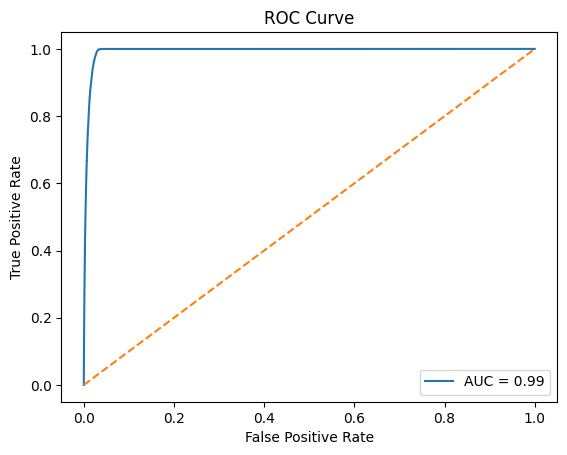

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# If your task is binary classification, calculate the AUC-ROC
Y_test_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # Probability predictions for class 1
auc_roc = roc_auc_score(Y_test_clean, Y_test_pred_proba)
print(f"AUC-ROC: {auc_roc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_clean, Y_test_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


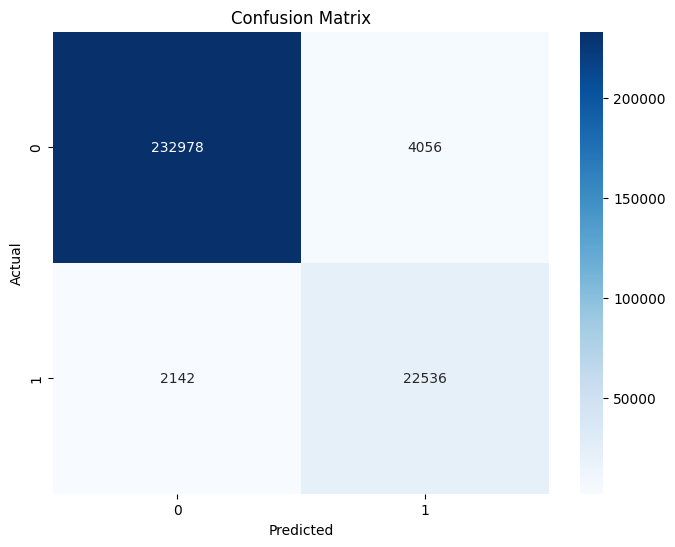

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(Y_test_clean, Y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Predict on the test set
Y_test_pred = model.predict(X_test_preprocessed)

# Print predictions
print("Predictions on test data:")
print(Y_test_pred)

# If you want probabilities (useful for binary classification tasks):
Y_test_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # Probabilities for class 1
print("Predicted probabilities for class 1:")
print(Y_test_pred_proba)


Predictions on test data:
[0 0 0 ... 0 0 0]
Predicted probabilities for class 1:
[0. 0. 0. ... 0. 0. 0.]


LOGISTIC REGRESSION

Accuracy for model 2: 0.969168398850645
Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.81      0.89      0.84     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.93      0.91    261712
weighted avg       0.97      0.97      0.97    261712

AUC-ROC for Model 2: 0.9891846433791459


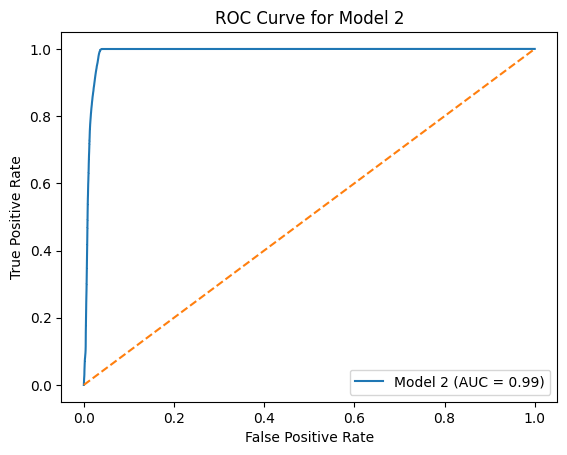

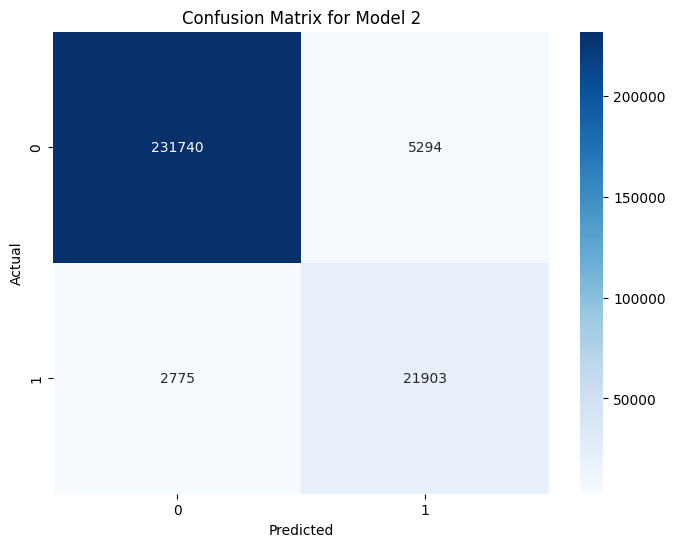

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model 2: Logistic Regression (for classification)
model_2 = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter if convergence is an issue
model_2.fit(X_train_preprocessed, Y_train_clean)

# Predict on the test set using Model 2
Y_test_pred_model_2 = model_2.predict(X_test_preprocessed)

# Evaluate Model 2
accuracy_model_2 = accuracy_score(Y_test_clean, Y_test_pred_model_2)
clf_report_model_2 = classification_report(Y_test_clean, Y_test_pred_model_2)

print(f"Accuracy for model 2: {accuracy_model_2}")
print(f"Classification Report for Model 2:\n{clf_report_model_2}")

# ROC-AUC for Model 2 (binary classification)
Y_test_pred_proba_model_2 = model_2.predict_proba(X_test_preprocessed)[:, 1]  # Probability predictions for class 1
auc_roc_model_2 = roc_auc_score(Y_test_clean, Y_test_pred_proba_model_2)
print(f"AUC-ROC for Model 2: {auc_roc_model_2}")

# Plot ROC curve for Model 2
fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test_clean, Y_test_pred_proba_model_2)
plt.plot(fpr_2, tpr_2, label=f'Model 2 (AUC = {auc_roc_model_2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 2')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Model 2
cm_model_2 = confusion_matrix(Y_test_clean, Y_test_pred_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model_2, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Model 2')
plt.show()


GRADIENT BOOSTING CLASSIFIER

Accuracy for model 3: 0.9762792688145748
Classification Report for Model 3:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.95      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712

AUC-ROC for Model 3: 0.9938465408422016


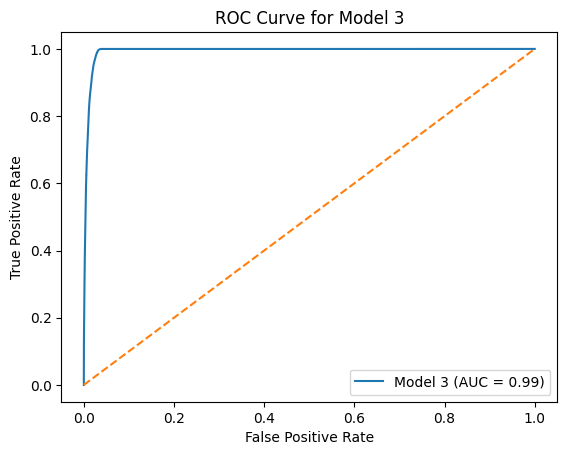

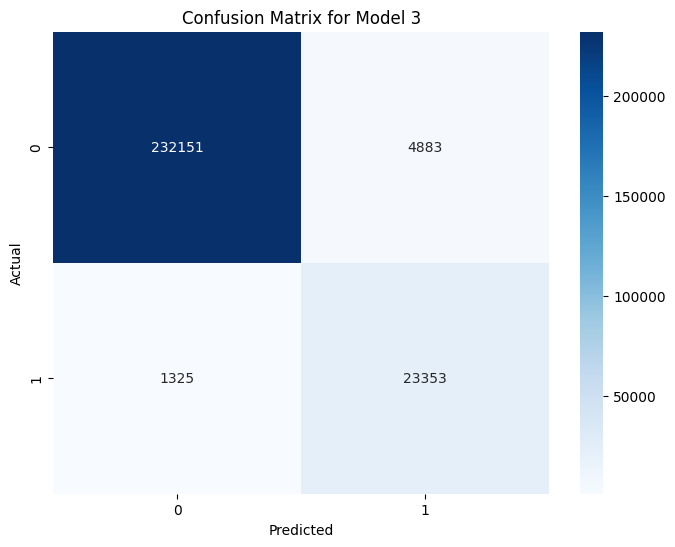

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Model 3: Gradient Boosting Classifier
model_3 = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators for tuning
model_3.fit(X_train_preprocessed, Y_train_clean)

# Predict on the test set using Model 3
Y_test_pred_model_3 = model_3.predict(X_test_preprocessed)

# Evaluate Model 3
accuracy_model_3 = accuracy_score(Y_test_clean, Y_test_pred_model_3)
clf_report_model_3 = classification_report(Y_test_clean, Y_test_pred_model_3)

print(f"Accuracy for model 3: {accuracy_model_3}")
print(f"Classification Report for Model 3:\n{clf_report_model_3}")

# ROC-AUC for Model 3 (binary classification)
Y_test_pred_proba_model_3 = model_3.predict_proba(X_test_preprocessed)[:, 1]  # Probability predictions for class 1
auc_roc_model_3 = roc_auc_score(Y_test_clean, Y_test_pred_proba_model_3)
print(f"AUC-ROC for Model 3: {auc_roc_model_3}")

# Plot ROC curve for Model 3
fpr_3, tpr_3, thresholds_3 = roc_curve(Y_test_clean, Y_test_pred_proba_model_3)
plt.plot(fpr_3, tpr_3, label=f'Model 3 (AUC = {auc_roc_model_3:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 3')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Model 3
cm_model_3 = confusion_matrix(Y_test_clean, Y_test_pred_model_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model_3, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Model 3')
plt.show()
